# A / B Testando promoções de marketing

Qual promoção foi a mais eficaz?

**Cenário:**

Uma cadeia de fast food planeja adicionar um novo item ao seu menu. No entanto, eles ainda estão indecisos entre três possíveis campanhas de marketing para promover o novo produto. Para determinar qual promoção tem maior efeito nas vendas, o novo item é introduzido em vários locais em  mercados selecionados aleatoriamente. Uma promoção diferente é usada em cada local e as vendas semanais do novo item são registradas nas primeiras quatro semanas

**A descrição do conjunto de dados:**
Nosso conjunto de dados consiste em 548 entradas, incluindo:
- MarketId: uma tag interna usada para descrever tipos de mercado, não a usaremos
- AgeOfStores: idade da loja em anos (1 a 28). A idade média de uma loja é de 8,5 anos.
- LocationID: identificador exclusivo para localização da loja. Cada local é identificado por um número. O número total de lojas é 137.
- Promoção: uma das três promoções testadas (1, 2, 3). Realmente não sabemos os detalhes de cada promoção.
- Vendas em milhares: valor de vendas para um LocationID, promoção e semana específicos. O valor médio das vendas é de 53,5 mil dólares.
- Tamanho do mercado: existem três tipos de tamanho de mercado: pequeno, médio e grande.
- Semana: uma das quatro semanas em que as promoções foram realizadas (1 a 4).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv"
df = pd.read_csv(file_name)

df.head(10)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
8,1,Medium,3,12,1,1,44.54
9,1,Medium,3,12,1,2,37.94


> Algumas estatísticas.

## Análise Explolatória de Dados

In [2]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n", df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  548
Columns  :  7

Features : 
 ['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion', 'week', 'SalesInThousands']

Missing values :   0

Unique values :  
 MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64


In [4]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
MarketID            548 non-null int64
MarketSize          548 non-null object
LocationID          548 non-null int64
AgeOfStore          548 non-null int64
Promotion           548 non-null int64
week                548 non-null int64
SalesInThousands    548 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.0+ KB


In [9]:
df.groupby('Promotion').sum()

,MarketID,LocationID,AgeOfStore,week,SalesInThousands
Promotion,,,,,
1,996,84016,1424,430,9993.03
2,1108,93520,1500,470,8897.93
3,1028,85316,1736,470,10408.52


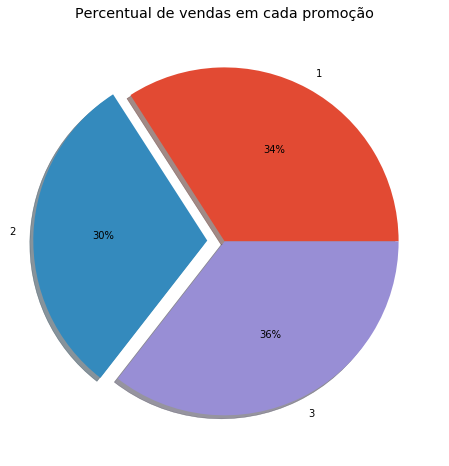

In [11]:
plt.style.use('ggplot')
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize=(8,8),
                                                                autopct='%1.0f%%',
                                                                shadow=True,
                                                                explode = (0, 0.1, 0))
ax.set_ylabel('')
ax.set_title('Percentual de vendas em cada promoção')

plt.show()

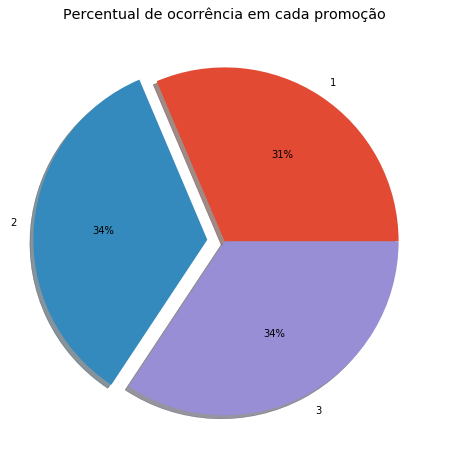

In [31]:
plt.style.use('ggplot')
ax = df.groupby('Promotion').count()['SalesInThousands'].plot.pie(figsize=(8,8),
                                                                autopct='%1.0f%%',
                                                                shadow=True,
                                                                explode = (0, 0.1, 0))
ax.set_ylabel('')
ax.set_title('Percentual de ocorrência em cada promoção')

plt.show()

> Quantidade de lojas agrupadas pelo tipo de promoção e tamanho do mercado em que elas atuam.

In [14]:
df.groupby(['Promotion', 'MarketSize']).count()['MarketID']

Promotion  MarketSize
1          Large          56
           Medium         96
           Small          20
2          Large          64
           Medium        108
           Small          16
3          Large          48
           Medium        116
           Small          24
Name: MarketID, dtype: int64

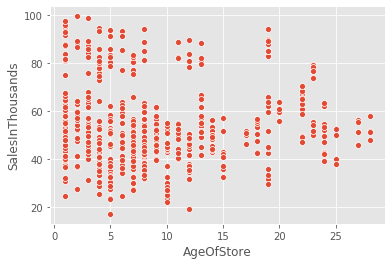

In [18]:
import seaborn as sns

sns.scatterplot(x=df.AgeOfStore, y=df.SalesInThousands)
plt.show()

<i> Não encontramos nenhuma relação entre a idade da loja e a quantidade de vendas
***
> Número de lojas 

In [19]:
df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize')

MarketSize,Large,Medium,Small
Promotion,,,
1,56,96,20
2,64,108,16
3,48,116,24


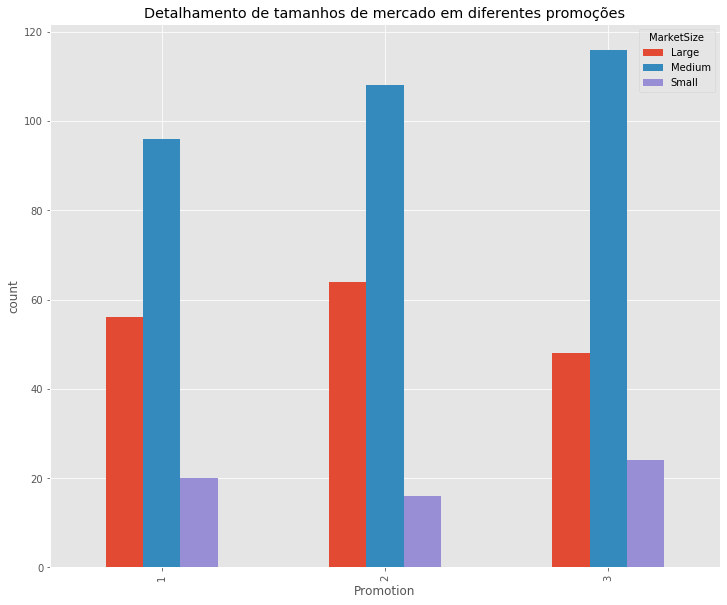

In [21]:
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,10),
    grid=True)

ax.set_ylabel('count')
ax.set_title('Detalhamento de tamanhos de mercado em diferentes promoções')

plt.show()

> Plotando a mesma informação em outro gráfico.

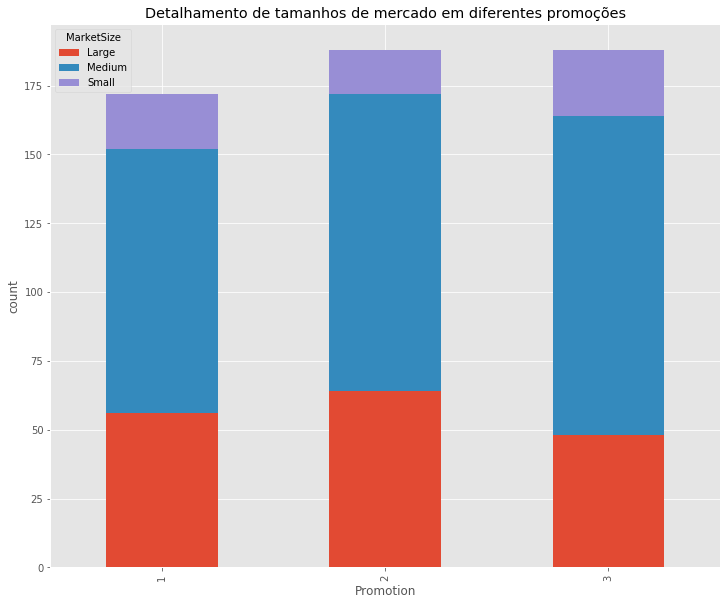

In [22]:
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',
    figsize=(12,10),
    grid=True,
    stacked=True)

ax.set_ylabel('count')
ax.set_title('Detalhamento de tamanhos de mercado em diferentes promoções')

plt.show()

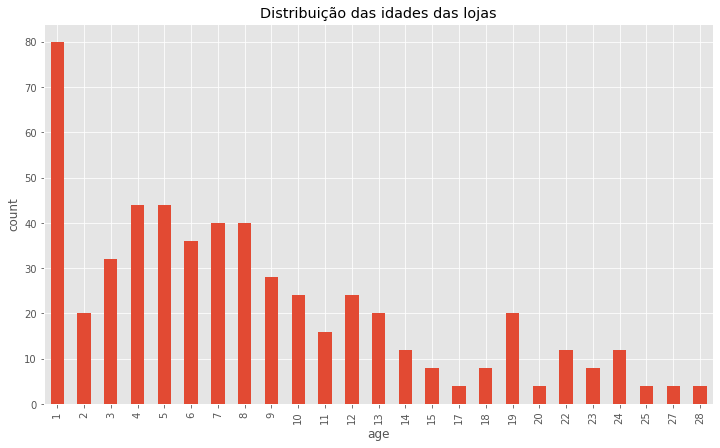

In [24]:
ax = df.groupby('AgeOfStore').count()['MarketID'].plot(
    kind='bar', 
    figsize=(12,7),
    grid=True)

ax.set_xlabel('age')
ax.set_ylabel('count')
ax.set_title('Distribuição das idades das lojas')

plt.show()

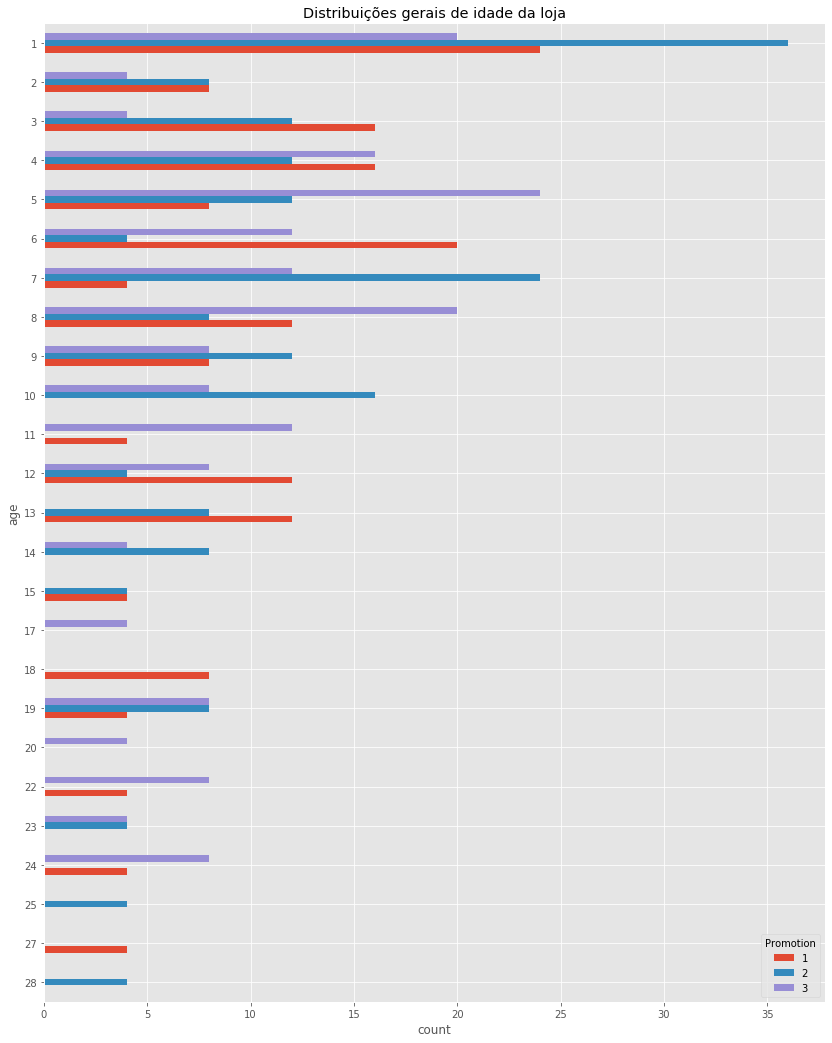

In [26]:
ax = df.groupby(['AgeOfStore', 'Promotion']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(
    kind='barh', 
    figsize=(14,18),
    grid=True)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('Distribuições gerais de idade da loja')

plt.show()

In [27]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


Essa tabela facilita o entendimento da distribuição geral das idades das lojas em nossas estatísticas resumidas.

Todos os grupos de teste têm perfis etários semelhantes e a idade média das lojas é de ~ 8 a 9 anos para esses 3 grupos.

A maioria das lojas tem entre 10 e 12 anos ou mais.

Podemos ver que os perfis da loja são semelhantes entre si.

Isso indica que nossos grupos de amostras são bem controlados e os resultados dos testes A / B serão significativos e confiáveis.
***

# A/B Testing

In [32]:
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
ns = df.groupby('Promotion').count()['SalesInThousands']
print(means)
print(stds)
print(ns)

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64
Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64
Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64


<i> Aqui fica evidente que mesmo apresentado um valor maior de vendas a promoção 3 tem uma média inferior quando relacionamos com o numero de promoções.
***
**Valor T**
O valor t mede o grau de diferença em relação à variação em nossos grupos de dados. Valores t grandes indicam um maior grau de diferença entre os grupos.

**Valor P**

O valor P mede a probabilidade de os resultados ocorrerem por acaso. Portanto, quanto menor o valor de p, maior a diferença estatisticamente significativa entre os dois grupos.

# Comparando a promoção 1 x a promoção 2 em um teste A / B

In [33]:
# Computing the t and p values using scipy 
from scipy import stats

t, p = stats.ttest_ind(df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
                       df.loc[df['Promotion'] == 2, 'SalesInThousands'].values, 
                       equal_var=False)
print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 6.42752867090748
p-value = 4.2903687179871785e-10


# Análise dos valores P e T
  Nosso **P-Value está próximo de 0**, o que sugere que há boas evidências para **REJEITAR a Hipótese Nula**. Significando que existe uma diferença estatística entre os dois grupos. Nossas rejeições de limiar Nulo geralmente são menores que 0,05.

Nosso **teste t** mostra que os desempenhos de marketing desses dois grupos são significativamente diferentes e que o grupo de promoção 1 supera o grupo de promoção 2.


# Comparando a promoção 1 x a promoção 3 em um teste A / B

Agora vamos notar que, se executarmos um teste t entre o grupo de promoção 1 e o grupo de promoção 3, veremos resultados diferentes:

In [34]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values, 
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values, 
    equal_var=False)

print("t-value = " +str(t))
print("p-value = " +str(p))

t-value = 1.5560224307758634
p-value = 0.12059147742229478


# Análise dos valores P e T

Observamos que as vendas médias do grupo de promoção 1 (58,1) são maiores que as do grupo de promoção 3 (55,36).

Mas, ao executar um teste t entre esses dois grupos, obtemos um valor t de 1,555 e um valor p de 0,121.

O valor p **calculado é muito superior a 0,05**, além do limite para significância estatística.